In [1]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from src.shadow_height_estimator import (estimate_building_heights,
                                        rotate_masks,
                                        take_indices_shadows,
                                        attach_heights, 
                                        buildings_info,
                                        )
from src.visualization_masks import (draw_masks,
                                    draw_random_masks,
                                    draw_sample_building_shadow,
                                    )
from src.coco2masks.coco2masks import coco2masks
import numpy as np

In [2]:
dataset_dir = '../../../shared_data/SatelliteTo3D-Datasets/3d_tools_dataset/'
annot_file = dataset_dir + 'annotations/instances_default.json'
images_directory = dataset_dir + 'image_png/'

In [3]:
SCALE = np.float16(0.1)
SUN_AZIMUTH_ANGLE = np.uint8(100)
SUN_ELEVATION_ANGLE = np.uint8(30)
ROTATE_ANGLE = SUN_AZIMUTH_ANGLE - 180
THRESHOLD = np.uint8(7)
BROWN = (np.uint8(128), np.uint8(64), np.uint8(48))
BLUE = (np.uint8(0), np.uint8(0), np.uint8(255))
COLORS = np.array([BROWN, BLUE])

In [4]:
image, masks = coco2masks(coco_annotation_file=annot_file, images_directory=images_directory)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


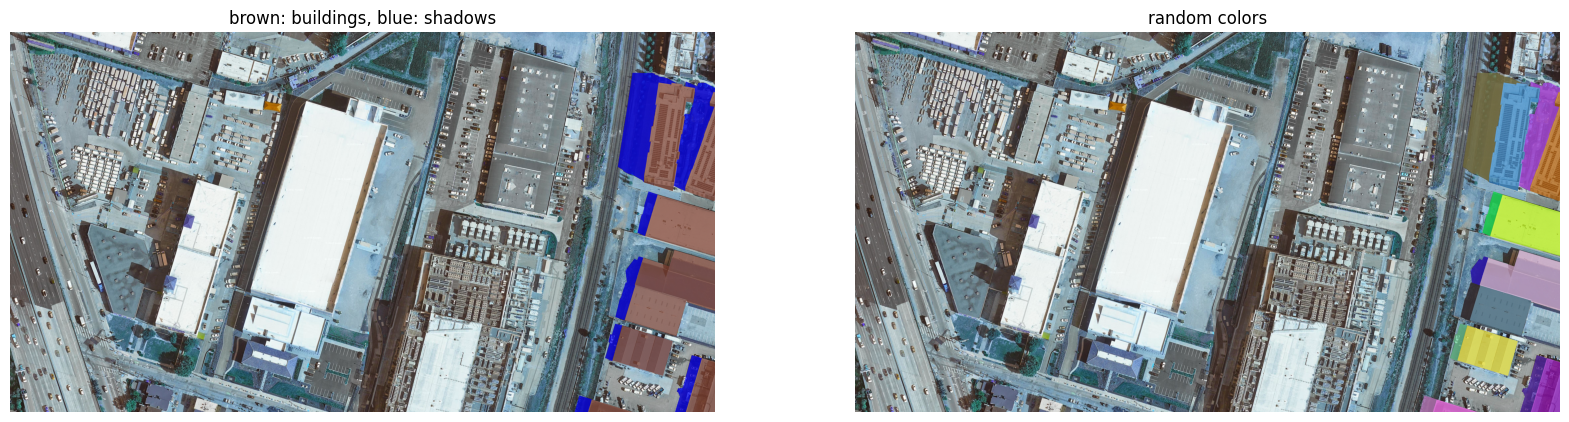

In [5]:
segment = draw_masks(image[0], masks, COLORS)
random_segment = draw_random_masks(image[0], masks)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,10))

ax[0].imshow(segment)
ax[0].set_title('brown: buildings, blue: shadows')
ax[0].set_axis_off()

ax[1].imshow(random_segment)
ax[1].set_title('random colors')
ax[1].set_axis_off()

plt.show()

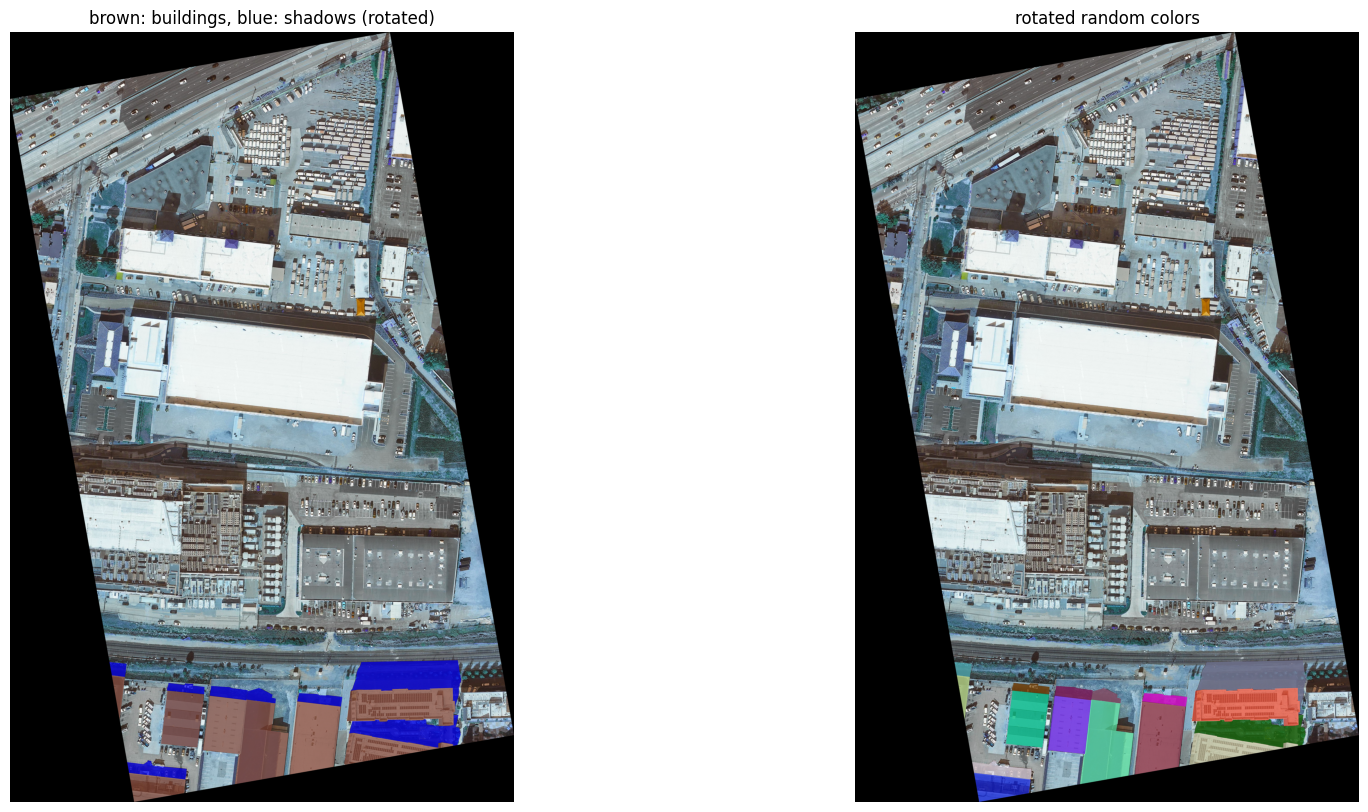

In [6]:
rotated_image = rotate(image[0], ROTATE_ANGLE)
rotated_masks = rotate_masks(masks, ROTATE_ANGLE)

rotated_segment = draw_masks(rotated_image, rotated_masks, COLORS)
rotated_random_segment = draw_random_masks(rotated_image, rotated_masks)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,10))

ax[0].imshow(rotated_segment)
ax[0].set_title('brown: buildings, blue: shadows (rotated)')
ax[0].set_axis_off()

ax[1].imshow(rotated_random_segment)
ax[1].set_title('rotated random colors')
ax[1].set_axis_off()

plt.show()

In [6]:
# list of rotated masks shadows + buildings
rotated_masks = rotate_masks(masks, ROTATE_ANGLE)

# dict of heights {index of shadow: estimated height}
building_heights = estimate_building_heights(masks, SUN_AZIMUTH_ANGLE, SCALE, SUN_ELEVATION_ANGLE)
print('building_heights', building_heights)

# dict {index of shadow: (max(y), mean(x))}
indices_shadows = take_indices_shadows(rotated_masks)
print('indices_shadows', indices_shadows)

# dict {'building_heights': {index of building: [estimated heights]}, 'building_shadow': {index of building: [indices of shadows]}}
building_heights_shadows = attach_heights(rotated_masks, building_heights, indices_shadows, THRESHOLD)
print('building_heights_shadows', building_heights_shadows)

result_dict = {}
for idx_building, heights in building_heights_shadows['building_heights'].items():
    result_dict[idx_building] = {'mask': masks[idx_building], 'heights': heights}

print('result_dict', result_dict)

building_heights {0: 9.59, 1: 22.03, 2: 27.64, 7: 13.61, 10: 7.25, 11: 10.08, 14: 7.9, 15: 8.66}
indices_shadows {0: (4364, 1426), 1: (4673, 2604), 2: (4401, 2602), 7: (4881, 957), 10: (4211, 705), 11: (4405, 2024), 14: (4384, 1633), 15: (4325, 1148)}
building_heights_shadows {'building_heights': {3: [27.64], 4: [7.25], 5: [8.66], 6: [22.03], 8: [13.61], 9: [9.59], 12: [10.08], 13: [7.9]}, 'building_shadow': {3: [2], 4: [10], 5: [15], 6: [1], 8: [7], 9: [0], 12: [11], 13: [14]}}
result_dict {3: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'heights': [27.64]}, 4: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'heights': [7.25]}, 

In [7]:
hyperparameters = {'masks': masks,
                'sun_azimuth_angle': SUN_AZIMUTH_ANGLE,
                'scale': SCALE,
                'sun_elevation_angle': SUN_ELEVATION_ANGLE,
                'threshold': THRESHOLD
                }

In [8]:
build_info = buildings_info(hyperparameters)
print(build_info)

{3: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'heights': [27.64]}, 4: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'heights': [7.25]}, 5: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'heights': [8.66]}, 6: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'heights': [22

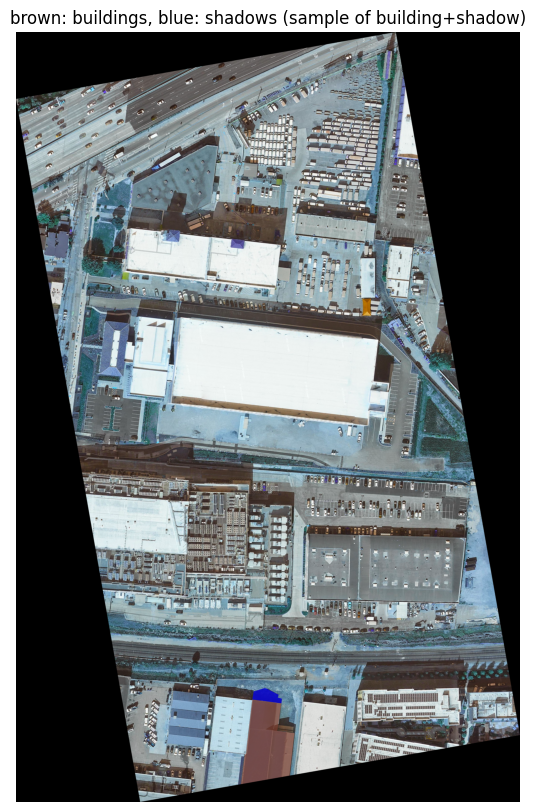

In [10]:
sample_segment = draw_sample_building_shadow(rotated_image, rotated_masks, building_heights_shadows['building_shadow'], COLORS)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))

ax.imshow(sample_segment)
ax.set_title('brown: buildings, blue: shadows (sample of building+shadow)')
ax.set_axis_off()

plt.show()